In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2016-murder-data/murder_2015_final.csv
/kaggle/input/2016-murder-data/murder_2016_prelim.csv


In [2]:
import pandas as pd
dat=pd.read_csv('/kaggle/input/2016-murder-data/murder_2015_final.csv')
dat2=pd.read_csv('/kaggle/input/2016-murder-data/murder_2016_prelim.csv')
dat

,city,state,2014_murders,2015_murders,change
0,Baltimore,Maryland,211,344,133
1,Chicago,Illinois,411,478,67
2,Houston,Texas,242,303,61
3,Cleveland,Ohio,63,120,57
4,Washington,D.C.,105,162,57
...,...,...,...,...,...
78,San Antonio,Texas,103,94,-9
79,Corpus Christi,Texas,27,17,-10
80,Pittsburgh,Pennsylvania,69,57,-12
81,Boston,Massachusetts,53,38,-15


Now we will perform EDA(Exploratory Data Analysis)

In [3]:
dat.head()

,city,state,2014_murders,2015_murders,change
0,Baltimore,Maryland,211,344,133
1,Chicago,Illinois,411,478,67
2,Houston,Texas,242,303,61
3,Cleveland,Ohio,63,120,57
4,Washington,D.C.,105,162,57


In [4]:
dat.shape # 83 rows, 5 coumns


(83, 5)

In [5]:
dat.size

415

In [6]:
dat.info

<bound method DataFrame.info of               city          state  2014_murders  2015_murders  change
0        Baltimore       Maryland           211           344     133
1          Chicago       Illinois           411           478      67
2          Houston          Texas           242           303      61
3        Cleveland           Ohio            63           120      57
4       Washington           D.C.           105           162      57
..             ...            ...           ...           ...     ...
78     San Antonio          Texas           103            94      -9
79  Corpus Christi          Texas            27            17     -10
80      Pittsburgh   Pennsylvania            69            57     -12
81          Boston  Massachusetts            53            38     -15
82         Buffalo       New York            60            41     -19

[83 rows x 5 columns]>

In [7]:
#unique
dat['change'].nunique()

42

In [8]:
dat['change'].unique()

array([133,  67,  61,  57,  55,  32,  31,  29,  28,  25,  22,  20,  19,
        17,  16,  15,  14,  13,  12,  11,   9,   8,   6,   5,   4,   3,
         2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10,
       -12, -15, -19])

In [9]:
# exact count of each
dat.groupby('change').size()

change
-19     1
-15     1
-12     1
-10     1
-9      2
-8      1
-7      1
-6      6
-5      4
-4      2
-3      2
-2      3
-1      1
 0      4
 1      5
 2      3
 3      3
 4      1
 5      6
 6      2
 8      2
 9      1
 11     1
 12     1
 13     5
 14     3
 15     1
 16     2
 17     1
 19     1
 20     1
 22     2
 25     1
 28     1
 29     1
 31     2
 32     1
 55     1
 57     2
 61     1
 67     1
 133    1
dtype: int64

In [10]:
dat.columns

Index(['city', 'state', '2014_murders', '2015_murders', 'change'], dtype='object')

In [11]:
dat['city'].nunique()

83

In [12]:
dat['state'].nunique()

34

In [13]:
dat['city'].nunique()

83

In [14]:
dat['2014_murders'].nunique()

59

In [15]:
dat['2015_murders'].nunique()

65

In [16]:
dat['change'].nunique()

42

In [17]:
dat['state'].unique()

array(['Maryland', 'Illinois', 'Texas', 'Ohio', 'D.C.', 'Wisconsin',
       'Pennsylvania', 'Missouri', 'Tennessee', 'Oklahoma', 'Kentucky',
       'Colorado', 'California', 'New York', 'Florida', 'Minnesota',
       'Nebraska', 'Alaska', 'North Carolina', 'Louisiana', 'New Mexico',
       'Indiana', 'New Jersey', 'Oregon', 'Nevada', 'Arizona', 'Virginia',
       'Georgia', 'Kansas', 'Michigan', 'Washington', 'Hawaii', 'Alabama',
       'Massachusetts'], dtype=object)

In [18]:
dat['2015_murders'].unique()

array([344, 478, 303, 120, 162, 145, 280, 109,  72, 188,  73,  81,  53,
       282, 136, 352,  32,  47,  48,  43,  26,  61, 164,  24,  25,  36,
        34, 148, 104,  55,  66,  22, 127,  85,  37,  16,  18,  27,  56,
        19,   2,  94,   4,  97,  17,   1,  49,   6, 112,  10,  30, 295,
        23,  31,   8,  15, 135,  14,  77,  75,  12,  39,  57,  38,  41])

In [19]:
dat['2014_murders'].unique()

array([211, 411, 242,  63, 105,  90, 248,  78,  41, 159,  45,  56,  31,
       260, 116, 333,  15,  32,  28,  12,  47, 150,  30,  11,  23,  21,
       136,  93,  46,  26,  60,  17,  20, 122,  80,  14,  24,  13,  54,
         0,   3,  96,  16,   1,   4,  49,   7, 114, 298,  35, 140,  19,
        83,  81,  18, 103,  27,  69,  53])

Data cleaning

In [20]:
dat.head()

,city,state,2014_murders,2015_murders,change
0,Baltimore,Maryland,211,344,133
1,Chicago,Illinois,411,478,67
2,Houston,Texas,242,303,61
3,Cleveland,Ohio,63,120,57
4,Washington,D.C.,105,162,57


In [21]:
dat.isnull().sum()

city            0
state           0
2014_murders    0
2015_murders    0
change          0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dat['state_'] = label_encoder.fit_transform(dat['state'])
dat['city_']=label_encoder.fit_transform(dat['city'])


In [23]:
dat.drop(['state'],axis=1,inplace=True)

In [24]:
dat.drop(['city'],axis=1,inplace=True)

In [25]:
dat.head()

,2014_murders,2015_murders,change,state_,city_
0,211,344,133,14,8
1,411,478,67,9,13
2,242,303,61,30,31
3,63,120,57,25,16
4,105,162,57,5,81


Relationship Analysis

In [26]:
import seaborn as sns
import numpy as np

corelation=dat.corr()

<Axes: >

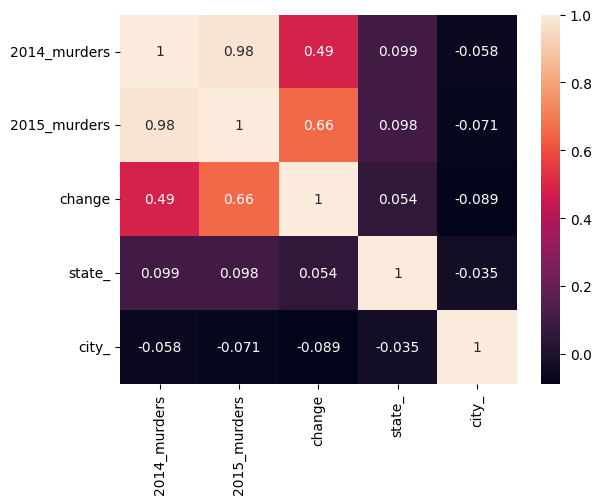

In [27]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


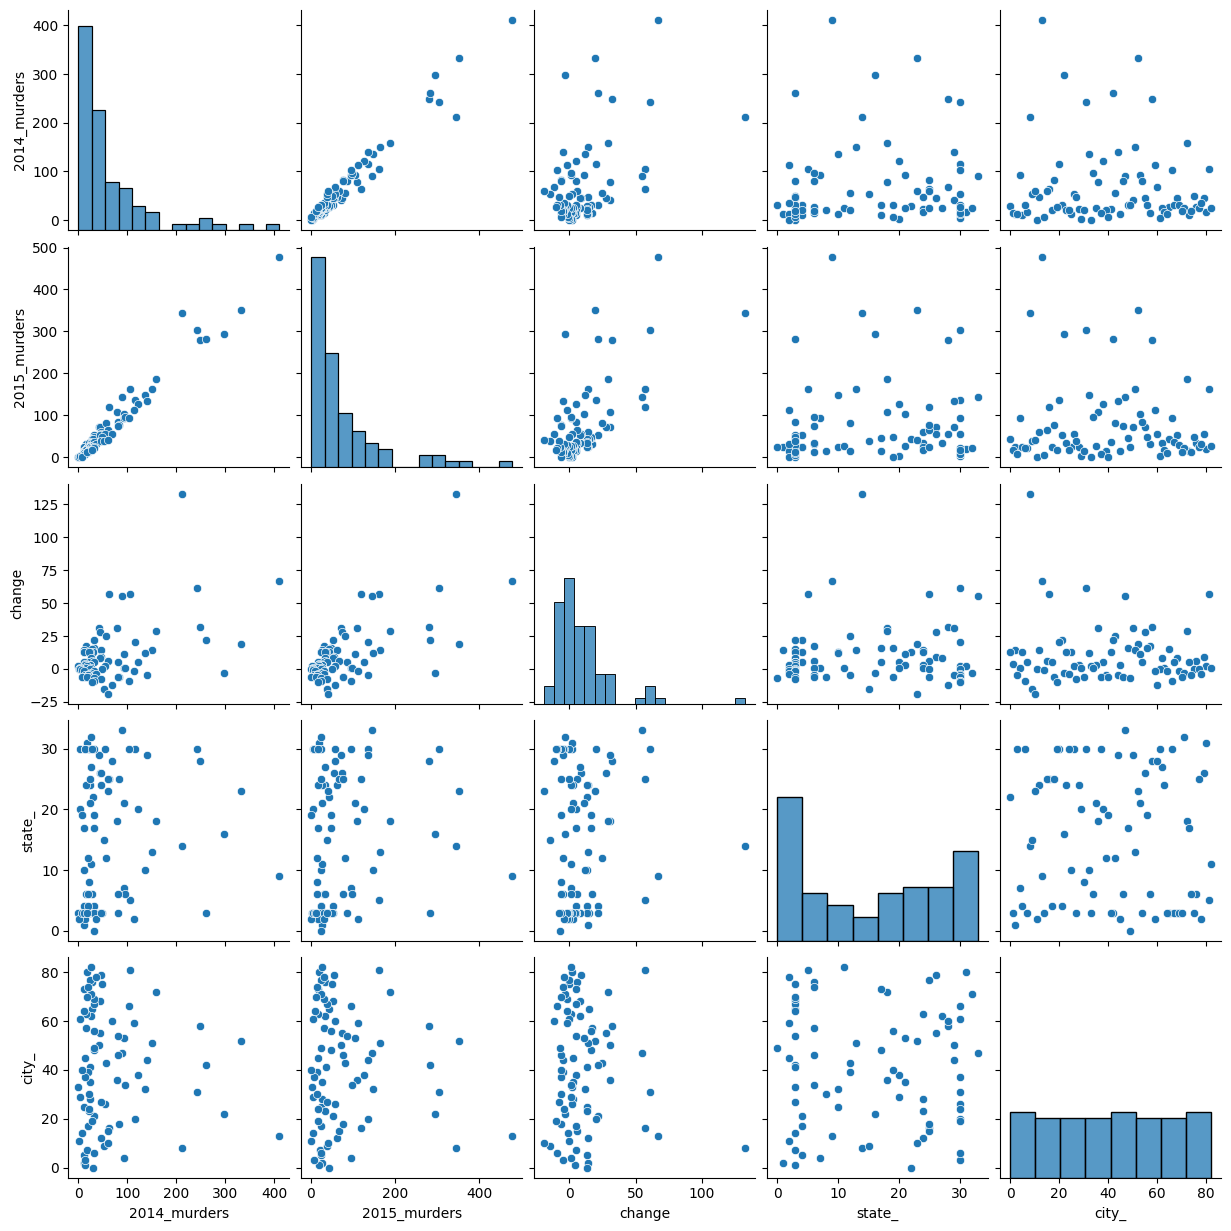

In [28]:
sns.pairplot(dat)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


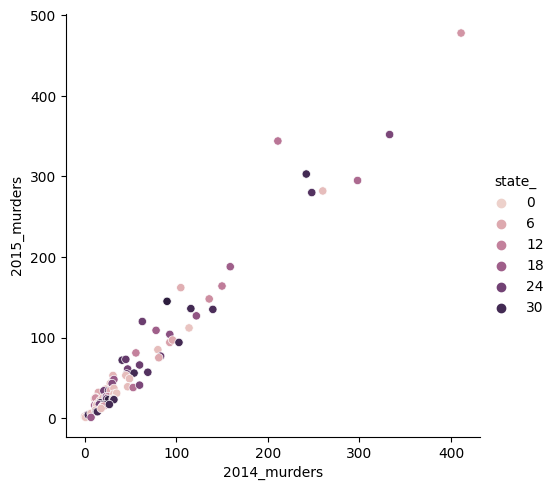

In [29]:
sns.relplot(x='2014_murders',y='2015_murders',hue='state_',data=dat)

In [30]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   2014_murders  83 non-null     int64
 1   2015_murders  83 non-null     int64
 2   change        83 non-null     int64
 3   state_        83 non-null     int64
 4   city_         83 non-null     int64
dtypes: int64(5)
memory usage: 3.4 KB


#input='2014_murders', "2015_murders", 'change'
#output='state_'

In [31]:
x=dat[['2014_murders', '2015_murders']]
y=dat['change']

In [32]:
x

,2014_murders,2015_murders
0,211,344
1,411,478
2,242,303
3,63,120
4,105,162
...,...,...
78,103,94
79,27,17
80,69,57
81,53,38


In [33]:
y

0     133
1      67
2      61
3      57
4      57
     ... 
78     -9
79    -10
80    -12
81    -15
82    -19
Name: change, Length: 83, dtype: int64

In [34]:
#train and test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [35]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(83, 2)
(62, 2)
(21, 2)


In [36]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(83,)
(62,)
(21,)


In [37]:
#apply a algorithm
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [38]:
# fit the model
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)
y_pred

array([ 9.00000000e+00, -1.22124533e-14,  3.00000000e+00, -2.00000000e+00,
        1.40000000e+01,  5.00000000e+00,  6.10000000e+01, -1.99840144e-15,
        1.30000000e+01,  3.10000000e+01, -5.00000000e+00,  2.20000000e+01,
       -6.00000000e+00, -8.00000000e+00,  1.70000000e+01,  1.30000000e+01,
        2.00000000e+00, -1.00000000e+00, -1.20000000e+01, -6.00000000e+00,
        3.00000000e+00])

In [40]:
y_test

30     9
53     0
42     3
59    -2
22    14
38     5
2     61
55     0
26    13
8     31
68    -5
13    22
71    -6
76    -8
16    17
27    13
45     2
57    -1
80   -12
73    -6
43     3
Name: change, dtype: int64

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
mse

2.9807437995819775e-28

In [43]:
r2

1.0

In [44]:
#individual pred
model.predict([[ 8.94557312e-01,  7.95762465e-01]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.09879485])

In [45]:
#custom
model.predict([[105, 162]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.])